**Importing Libraries and Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score, classification_report, precision_recall_curve, f1_score, accuracy_score, roc_curve, roc_auc_score, auc

import xgboost as xgb
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import dropout
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
df = pd.read_csv("/full_data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


**Exploratory Data Analysis**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
cat_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for category in cat_variables:
    print(f"{category}: {df[category].unique()}")

gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
df['gender'] = [1 if i == 'Male' else 0 for i in df['gender']]
df['ever_married'] = [1 if i =='Yes' else 0 for i in df['ever_married']]
df['Residence_type'] = [1 if i =='Urban' else 0 for i in df['Residence_type']]
df = pd.get_dummies(df, columns = ['work_type', 'smoking_status'])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


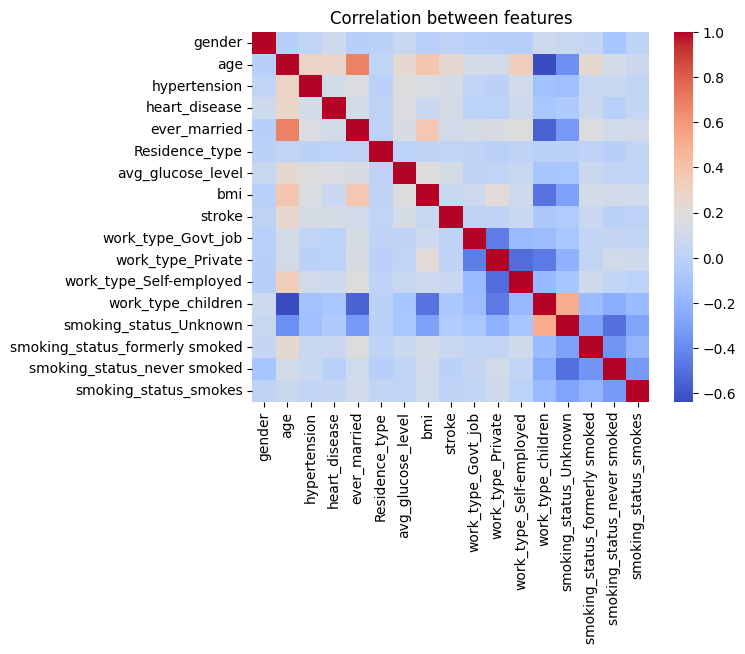

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

**Effect of age on brain stroke**

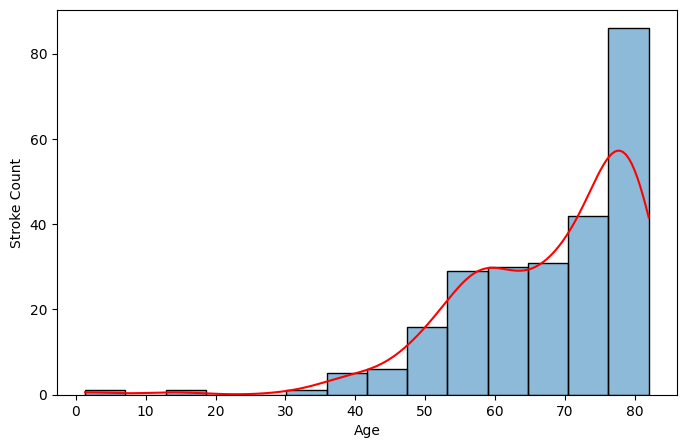

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.histplot(x=df['age'][df['stroke']==1], kde=True)
plt.xlabel('Age')
plt.ylabel('Stroke Count')
ax.lines[0].set_color('red')
plt.show()

**Effect of hypertension on brain stroke**

stroke in people with hypertension is 13.78%
stroke in people without hypertension is 4.04%


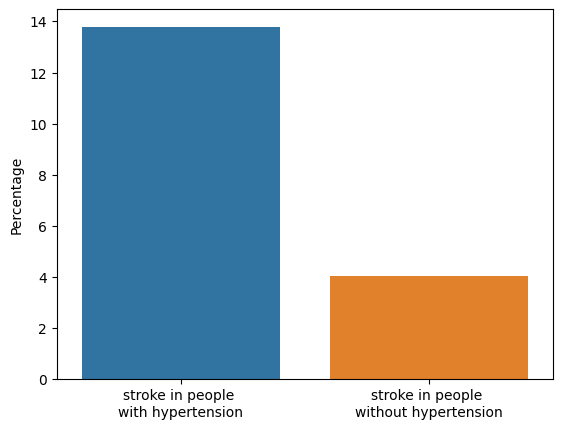

In [ ]:
stroke_hyperplus = df[(df['stroke']==1) & (df['hypertension']==1)]
stroke_hyperneg = df[(df['stroke']==1) & (df['hypertension']==0)]

perc_stroke_hyperplus = len(stroke_hyperplus)/(len(df[df['hypertension']==1])) * 100
perc_stroke_hyperneg = len(stroke_hyperneg)/(len(df[df['hypertension']==0])) * 100

print(f"stroke in people with hypertension is {round(perc_stroke_hyperplus, 2)}%")
print(f"stroke in people without hypertension is {round(perc_stroke_hyperneg, 2)}%")

sns.barplot(x=["stroke in people \nwith hypertension", 'stroke in people \nwithout hypertension'],
            y=[perc_stroke_hyperplus, perc_stroke_hyperneg])
plt.ylabel('Percentage')
plt.show()

The percentage of brain stroke is higher in people with hypertension compared to people without hypertension based on this dataset.

**The relationship between BMI and stroke**

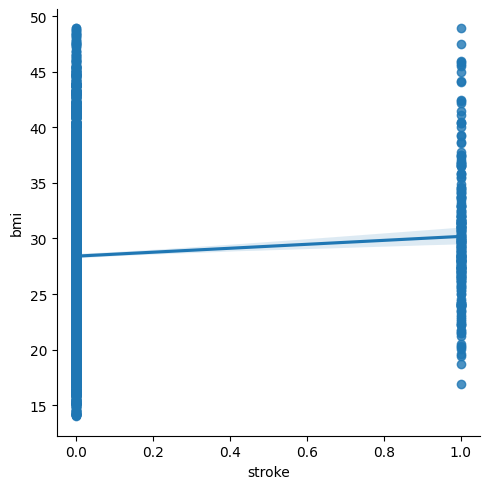

In [ ]:
sns.lmplot(x='stroke', y='bmi', data=df)
plt.show()

High BMI (more weight) can also increase the chance of getting a stroke.

**Data** **Processing**

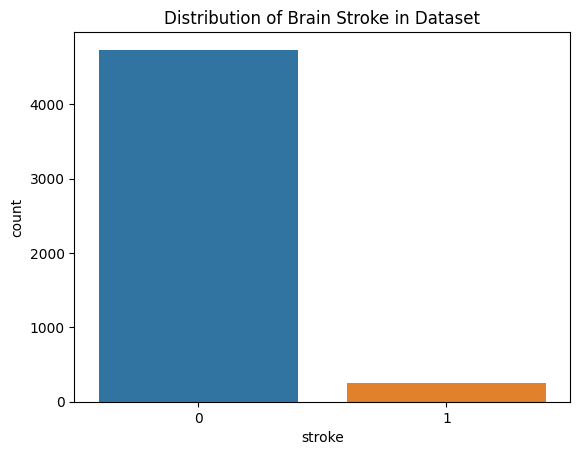

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Brain Stroke in Dataset')

plt.show()

Our data is imbalance and the and people without brain stroke is much higher than people with brain stroke. So we have to balance the data.

**SMOTE (Synthetic Minority Over-sampling Technique)**

In [ ]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
(y_train.shape, y_test.shape)


((3735,), (1246,))

Before balance:
0    3556
1     179
Name: stroke, dtype: int64


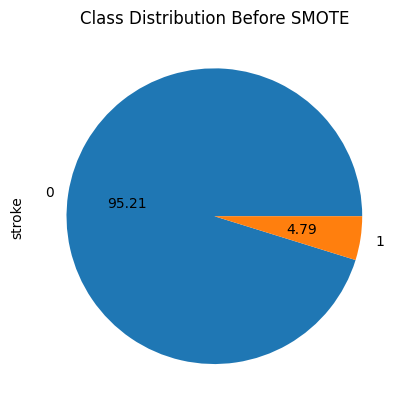


After balance:
0    3556
1    3556
Name: stroke, dtype: int64


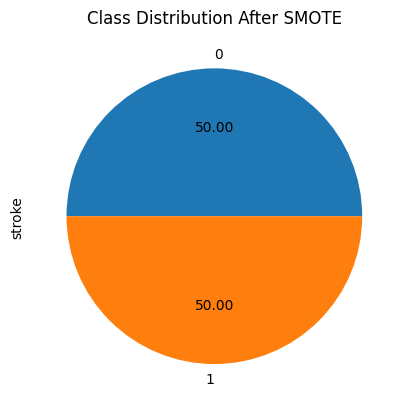

In [ ]:
print('Before balance:')
print(y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution Before SMOTE')
plt.show()

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('\nAfter balance:')
print(y_train_sm.value_counts())
y_train_sm.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution After SMOTE')
plt.show()

**XGBoost Model Buliding**

In [ ]:
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300]
}


xgb_model = XGBClassifier(objective='binary:logistic', random_state = 42)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='average_precision')


grid_search.fit(X_train_sm, y_train_sm)


print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score:  0.9943618675571312


In [ ]:
xgboost_model = XGBClassifier(objective='binary:logistic',
                              n_estimators=300,
                              max_depth=10,
                              learning_rate=0.1,
                              random_state=42)

xgboost_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgboost_model.predict(X_test)

**Model Evaluation**

In [ ]:
print(f'Classification Report \n\n{classification_report(y_test, y_pred)}')

Classification Report 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1177
           1       0.10      0.04      0.06        69

    accuracy                           0.93      1246
   macro avg       0.52      0.51      0.51      1246
weighted avg       0.90      0.93      0.91      1246



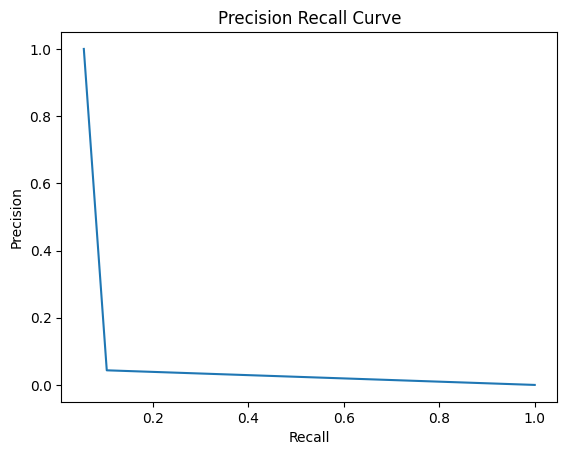

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_precision,lr_recall)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve')
plt.show()

**AUC-PR** stands for Area Under the Precision-Recall Curve. It is a metric used to evaluate the performance of a binary classification model, particularly in cases where the data is imbalanced or the focus is on the positive class.

In [ ]:
auc_pr = auc(lr_recall, lr_precision)
print("AUC-PR:", auc_pr)

AUC-PR: 0.09994801956966942


The **F1-score** is a measure of a model's accuracy, taking into account both precision and recall. It is particularly useful when dealing with imbalanced datasets or when both precision and recall are important.

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f'f1-score : {f1: .4f}. ')

f1-score :  0.0612. 
